In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory  
import matplotlib.pyplot as plt
import os 

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (255,255)
CHANNEL = 3
epochs = 20

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join('soil_image','crop 1)',
    seed = 123,
    shuffle = True,
    image_size = (255,255),
    batch_size = 32,
    validation_split = 0.1,
    subset='training',
    label_mode = 'int'
)

SyntaxError: incomplete input (2876904757.py, line 10)

In [107]:
1215/32

37.96875

In [108]:
class_names = dataset.class_names

In [109]:
print("Classes in train dataset:", dataset.class_names)
print("Classes in test dataset:", dataset.class_names)

Classes in train dataset: ['Soil types', 'crop (5)', 'crop 2', 'crop 3', 'crop 4', 'crop_1']
Classes in test dataset: ['Soil types', 'crop (5)', 'crop 2', 'crop 3', 'crop 4', 'crop_1']


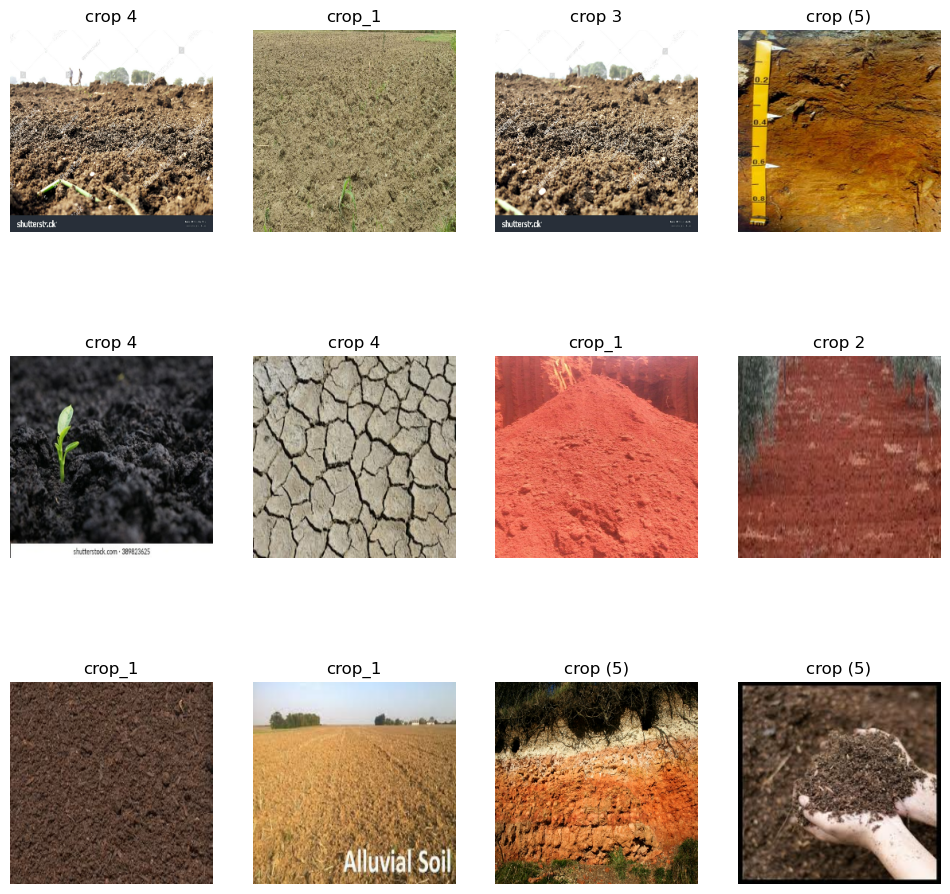

In [110]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):

    for i in range(12):
        pass
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
    
        label= label_batch[i].numpy().item()
        plt.title(dataset.class_names[label_batch[i].numpy()])
        plt.axis('off')
plt.show()

In [111]:
def load_jpg_image(file_path):
    try:
        image = tf.io.read_file(file_path)
        image = tf.io.decode_jpeg(image, channels=3)  # Decode JPG images as RGB
        image = tf.image.resize(image, [255, 255])  # Resize to the expected size (255, 255)
        image = image / 255.0  # Normalize to [0, 1]
        return image
    except tf.errors.InvalidArgumentError:
        # Skip invalid files
        print(f"Skipping invalid file: {file_path.numpy()}")
        return None  # Return None for invalid files


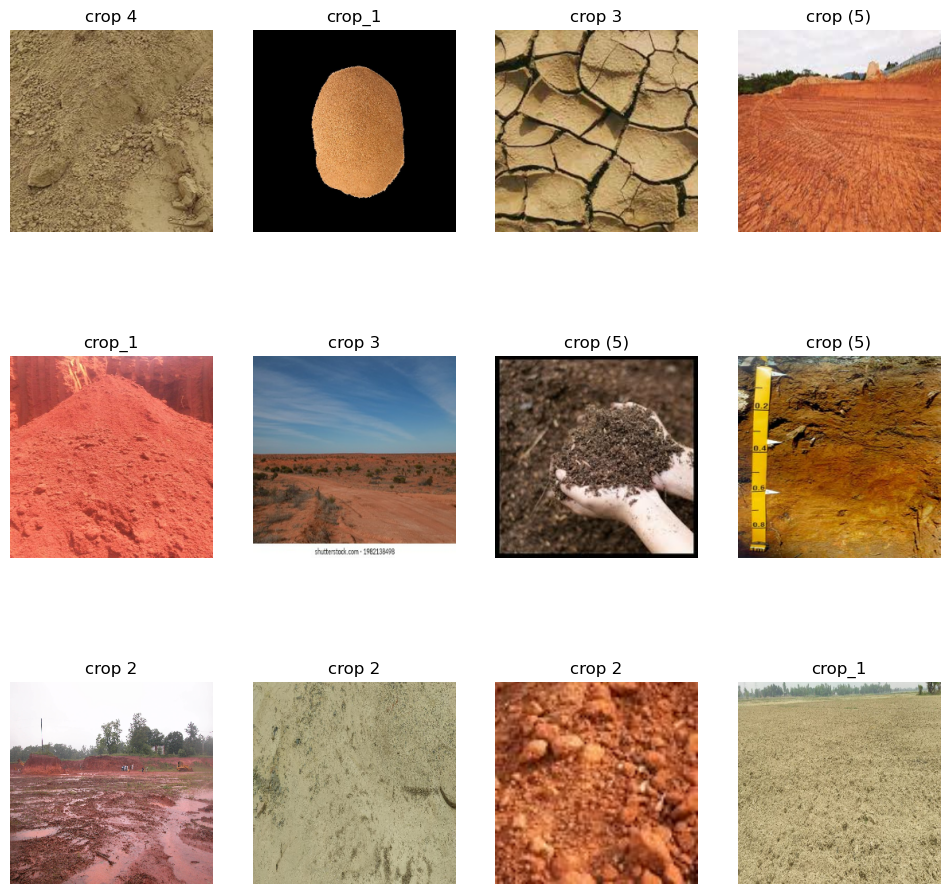

In [112]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):

    for i in range(12):
        pass
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
    
        label= label_batch[i].numpy().item()
        plt.title(dataset.class_names[label_batch[i].numpy()])
        plt.axis('off')
plt.show()

In [113]:
total_batches = len(dataset)
print(f'Total number of batches in dataset: {total_batches}')

Total number of batches in dataset: 145


In [114]:
len(dataset)

145

In [115]:
train_size= 0.8
len(dataset)*train_size*32

3712.0

In [116]:
train_ds = dataset.take(128)
len(train_ds)

128

In [117]:
test_ds = dataset.skip(128)
len(test_ds)

17

In [118]:
val_size = 0.2
len(dataset)* val_size

29.0

In [119]:
val_ds = test_ds.take(15)
len(val_ds)

15

In [120]:
test_ds = test_ds.skip(15)
len(test_ds)

2

In [121]:
# import os

# root_folder = r"C:\Users\online\SMSR\Fruit\soil_image"

# jpg_files = []
# for subdir, _, files in os.walk(root_folder):
#     for file in files:
#         if file.lower().endswith(".jpg"):  # Check for .jpg (case-insensitive)
#             jpg_files.append(os.path.join(subdir, file))

# if jpg_files:
#     print(f"Found {len(jpg_files)} JPG files:")
#     print("\n".join(jpg_files[:5]))  # Print first 5 JPG files
# else:
#     print("No JPG files found! Check file extensions or folder path.")

In [122]:
import os

root_folder = r"C:\Users\online\SMSR\Fruit\soil_image"

# Load only .jpg images from all subdirectories
file_pattern = os.path.join(root_folder, "*", "*", "*", "*", "*.jpg")

dataset = tf.data.Dataset.list_files(file_pattern, shuffle=False)

def load_jpg_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.io.decode_jpeg(image, channels=3)
    
    return image
    
    # dataset = dataset.map(lambda x: load_jpg_image(x))

    dataset = dataset.batch(32)


dataset = dataset.map(load_jpg_image)


# Check if images are loaded
for img in dataset.take(5):
    print(image_batch.shape)  

(32, 255, 255, 3)
(32, 255, 255, 3)
(32, 255, 255, 3)
(32, 255, 255, 3)
(32, 255, 255, 3)


In [123]:
import os
file_pattern = os.path.join(root_folder, "*", "*", "*", "*", "*.jpg")  # Standard .jpg
file_pattern_jpg = os.path.join(root_folder, "*", "*", "*", "*", "*.JPG.jpg")  # Handle .JPG.jpg

# Combine both patterns
dataset = tf.data.Dataset.list_files(file_pattern, shuffle=False).concatenate(
    tf.data.Dataset.list_files(file_pattern_jpg, shuffle=False)
)

In [124]:
# def is_jpg(file_path):
#     return tf.strings.regex_full_match(file_path, ".*\\.jpg$|.*\\.JPG.jpg$")

# # Apply filter to select only .jpg files
# dataset = dataset.filter(is_jpg)

# # Define the function to load and preprocess images with error handling
# def load_jpg_image(file_path):
#     try:
#         image = tf.io.read_file(file_path)
#         image = tf.io.decode_jpeg(image, channels=3)  # Decode JPG images as RGB
#         image = tf.image.resize(image, [224, 224])  # Resize to a fixed size (optional)
#         image = image / 255.0  # Normalize to [0, 1]
#         return image
#     except tf.errors.InvalidArgumentError:
#         # Handle invalid or corrupted files gracefully
#         print(f"Skipping invalid file: {file_path.numpy()}")
#         return None  # Return None for invalid files

# # Apply the function to load and preprocess images
# dataset = dataset.map(lambda x: load_jpg_image(x))

# # Remove None values (invalid files) from the dataset
# dataset = dataset.filter(lambda x: x is not None)

In [125]:
import tensorflow as tf

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1, "Train, validation, and test splits must sum to 1"
    
    # Calculate the size of the dataset
    ds_size = ds.cardinality().numpy()  # Use cardinality to get the dataset size
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

# Example usage
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(255, 255, 3)),

])


In [126]:
train_size = train_ds.cardinality().numpy()
val_size = val_ds.cardinality().numpy()
test_size = test_ds.cardinality().numpy()

In [127]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [128]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(0/255) #Scales pixel values from [0, 255] to [0, 1] (better for neural networks).
])

In [129]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [141]:
# for item in train_ds.take(1):  # Take a single batch
#     print(item)  # 
for images, labels in dataset.take(1):
    print("Image batch shape:", images.shape)  # Expected: (batch_size, 128, 128, 3)
    print("Label batch shape:", labels.shape)  # Expected: (batch_size,)

TypeError: Cannot iterate over a scalar tensor.

In [132]:
train_ds = train_ds.batch(32)

In [133]:
# train_ds = train_ds.map(lambda x,y: (data_augmentation(x,training=True),y)).prefetch(buffer_size =tf.data.AUTOTUNE)
# for x, y in train_ds.take(1):  # Take a single batch
#     print(x.shape)  # Should print (batch_size, height, width, channels)
#     print(y.shape)  # Should print (batch_size, number_of_classes)

In [134]:
input_shape = [32,255,255,3]  

model = models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Rescaling(0./255, input_shape=(32, 255,255, 3)),
    layers.Conv2D(32,kernel_size=(3,3), activation='relu'), #input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(), # we will use this because the image will in 2D so to convert it in 1D , we have to use ['Flatten'] 
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax') # We will use Softmax instead of Sigmoid 
    
])
# model.build(input_shape=(32,255,255,3))
# inputs=tf.Tensor(shape=(32,255,255,3), dtype=int)

In [135]:
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [136]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer = 'adam', metrics = ['accuracy'])

In [137]:
# for x, y in train_ds.take(1):
#     print(x.shape, y.shape)  # Ensure both image and label are present

# # Apply data augmentation on images in the training dataset
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [138]:
# history = model.fit(
#     dataset,
#     batch_size = 32,
#     validation_data= val_ds,
#     verbose = 1,
#     epochs = 20,
# )

In [139]:
history=model.fit(dataset,epochs=20,verbose=1,validation_data=dataset,shuffle=True)

Epoch 1/20


IndexError: Exception encountered when calling Resizing.call().

[1mlist assignment index out of range[0m

Arguments received by Resizing.call():
  • args=('<KerasTensor shape=(), dtype=float32, sparse=False, name=keras_tensor_25>',)
  • kwargs={'training': 'True'}